In [31]:
from collections import Counter, defaultdict

import pandas as pd

from lazyme import find_files, per_section

In [30]:
import numpy as np
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set(style="darkgrid")

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

# Parse the ACL titles

In [84]:
genre_counts = Counter()
author_genre_counts = defaultdict(Counter)
author_counts = Counter()

for filename in find_files('data/', '*.txt'):
    genre = filename.split('/')[-1][:-4]
    with open(filename) as fin:
        for title, authors_str in per_section(fin):
            genre_counts[genre] += 1
            # Authors. 
            paper_authors = authors_str.split(', ')
            paper_authors = paper_authors[:-1] + paper_authors[-1].split(' and ')
            # Compute statistics.
            author_counts.update(paper_authors)
            for a in paper_authors:
                author_genre_counts[a][genre] += 1

# How many papers per genre?

In [85]:
for genre, num_papers in genre_counts.most_common():
    print(num_papers, '\t', genre, 'papers')

571 	 long papers
208 	 short papers
49 	 student papers
43 	 demo papers


# How many papers can an author publish in ACL?

In [86]:
nc = Counter(author_counts.values())

In [87]:
for num_paper in sorted(nc):
    num_author = nc[num_paper]
    print(num_author, '\tauthors published', num_paper, 'paper(s) in ACL 2020')

2198 	authors published 1 paper(s) in ACL 2020
402 	authors published 2 paper(s) in ACL 2020
110 	authors published 3 paper(s) in ACL 2020
37 	authors published 4 paper(s) in ACL 2020
16 	authors published 5 paper(s) in ACL 2020
4 	authors published 6 paper(s) in ACL 2020
10 	authors published 7 paper(s) in ACL 2020
1 	authors published 8 paper(s) in ACL 2020
2 	authors published 9 paper(s) in ACL 2020
2 	authors published 10 paper(s) in ACL 2020
1 	authors published 11 paper(s) in ACL 2020
1 	authors published 12 paper(s) in ACL 2020


<BarContainer object of 3 artists>

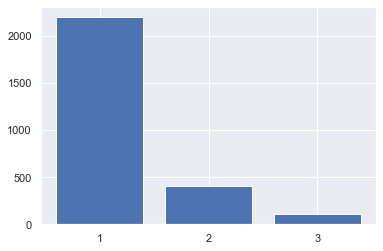

In [88]:
nc_123 = {'1':nc[1], '2':nc[2], '3':nc[3]}
plt.bar(nc_123.keys(), nc_123.values())

<BarContainer object of 4 artists>

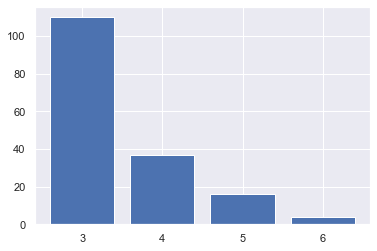

In [89]:
nc_3to6 = {str(k):v for k,v in sorted(nc.items()) if 2 < k < 7}
plt.bar(nc_3to6.keys(), nc_3to6.values())

<BarContainer object of 7 artists>

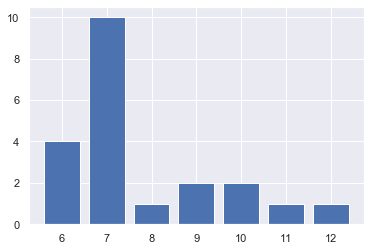

In [90]:
nc_5toend = {str(k):v for k,v in sorted(nc.items()) if k > 5}
plt.bar(nc_5toend.keys(), nc_5toend.values())

In [91]:
author_counts.most_common()

[('Ming Zhou', 12),
 ('Yue Zhang', 11),
 ('Ting Liu', 10),
 ('Graham Neubig', 10),
 ('Yoav Goldberg', 9),
 ('Kentaro Inui', 9),
 ('Kai-Wei Chang', 8),
 ('Wanxiang Che', 7),
 ('Ryan Cotterell', 7),
 ('Luke Zettlemoyer', 7),
 ('Rui Wang', 7),
 ('Jun Suzuki', 7),
 ('Zhiyuan Liu', 7),
 ('Xiaojun Wan', 7),
 ('Noah A. Smith', 7),
 ('Jie Zhou', 7),
 ('Nan Duan', 7),
 ('Jianfeng Gao', 6),
 ('Dong Yu', 6),
 ('Mohit Bansal', 6),
 ('Hua Wu', 6),
 ('Xiang Ren', 5),
 ('Josef van Genabith', 5),
 ('Richard Socher', 5),
 ('Caiming Xiong', 5),
 ('Adina Williams', 5),
 ('Sameer Singh', 5),
 ('Alan W Black', 5),
 ('Percy Liang', 5),
 ('Xuanjing Huang', 5),
 ('Hinrich Schütze', 5),
 ('Jason Weston', 5),
 ('Xiaojun Quan', 5),
 ('Haifeng Wang', 5),
 ('Iryna Gurevych', 5),
 ('Daxin Jiang', 5),
 ('Jian Yin', 5),
 ('Kang Liu', 4),
 ('Minlie Huang', 4),
 ('Preslav Nakov', 4),
 ('Christopher D. Manning', 4),
 ('Sarthak Jain', 4),
 ('Byron C. Wallace', 4),
 ('Hao Zhou', 4),
 ('Lingfei Wu', 4),
 ('Yiming Yang', 4)